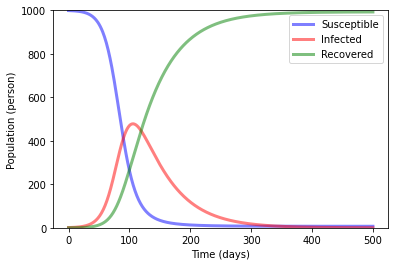

In [8]:
# https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000

# Initial number of infected and recovered individuals.
I0, R0 = 1, 0

# Assume S + I + R = N
S0 = N - I0 - R0

# beta is infection rate, gamma is recovery rate, (unit 1/days).
beta = 0.1
gamma = 0.02 

# Discretize time 160 days 
t = np.linspace(0, 500, 500)

# Define SIR model.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta*S*I / N
    dIdt =  beta*S*I / N - gamma*I
    dRdt =  gamma*I
    return dSdt, dIdt, dRdt

# Set Initial values in term of vector
y0 = S0, I0, R0

# Integrate the ODE system using builtin odeint
result = odeint(deriv, y0, t, args=(N, beta, gamma))

# Get the numerical results over time
S, I, R = result.T

# Visualization
plt.plot(t, S, 'b', alpha=0.5, lw=3, label='Susceptible')
plt.plot(t, I, 'r', alpha=0.5, lw=3, label='Infected')
plt.plot(t, R, 'g', alpha=0.5, lw=3, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Population (person)')
plt.ylim(0,1000)
legend = plt.legend()
legend.get_frame().set_alpha(0.8)
#plt.savefig('SIR.eps', bbox_inches='tight')
plt.show()